<a href="https://colab.research.google.com/github/WarishAli1/Deep-Learning-Study/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# here we will train our vision model with our own data via: custom datasets

https://www.learnpytorch.io/

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# data

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/") # it is a folder named data
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} does not exist, creating ")
  image_path.mkdir(parents=True, exist_ok=True)

# download data from github
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("downloading file")
  f.write(request.content)

# unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("unzipping file")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi directory already exists
downloading file
unzipping file


# data preparation and data exploration

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")



In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in 'data/pizza_steak_sushi'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
there are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
there are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
there are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
there are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
there are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
there are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
there are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'


In [ ]:
 # train and test paths
 train_dir = image_path/"train"
 test_dir = image_path/"test"

 train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualizing and image

1. get all of the image paths
2. pick random image path using python's random.choice
3. get the image class name using `pathlib.Path.parent.stem`
4. open the image using python's PIL
5. show image and print metadata

randome image path data/pizza_steak_sushi/train/steak/2614189.jpg
randome image class steak
randome image height 512
randome image width 512


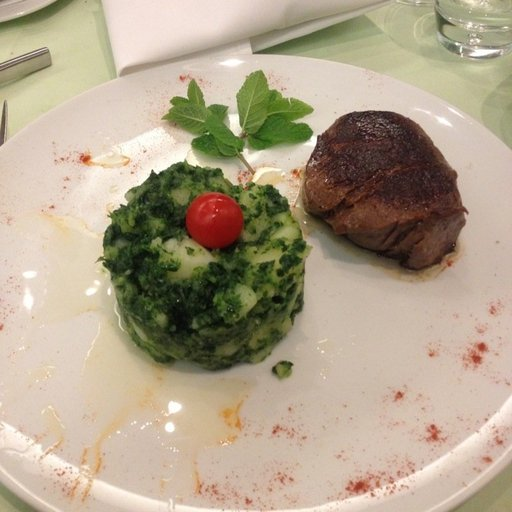

In [ ]:
import random
from PIL import Image

#random.seed(42)

# 1
image_path_list = list(image_path.glob("*/*/*.jpg"))
#2
random_image_path = random.choice(image_path_list)
#3
image_class = random_image_path.parent.stem
#4
img = Image.open(random_image_path)
#5
print(f"randome image path {random_image_path}")
print(f"randome image class {image_class}")
print(f"randome image height {img.height}")
print(f"randome image width {img.width}")
img




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_arr = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_arr)
plt.title(f"image class {image_class} | image shape {img_as_arr.shape}")
plt.axis(False)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

array([[[110,  94,  81],
        [113,  97,  84],
        [123, 107,  94],
        ...,
        [170, 166, 128],
        [169, 166, 125],
        [155, 152, 111]],

       [[125, 109,  96],
        [132, 116, 103],
        [144, 128, 115],
        ...,
        [173, 169, 131],
        [173, 169, 131],
        [161, 158, 117]],

       [[157, 141, 128],
        [162, 146, 133],
        [167, 151, 138],
        ...,
        [172, 168, 130],
        [174, 170, 132],
        [164, 160, 122]],

       ...,

       [[172, 163, 122],
        [175, 166, 125],
        [175, 166, 125],
        ...,
        [157, 143, 104],
        [158, 144, 105],
        [161, 147, 108]],

       [[173, 164, 123],
        [176, 167, 126],
        [177, 168, 127],
        ...,
        [157, 143, 106],
        [157, 143, 104],
        [159, 145, 106]],

       [[173, 164, 123],
        [177, 168, 127],
        [178, 169, 128],
        ...,
        [157, 143, 106],
        [157, 143, 104],
        [158, 144, 105]]], dtype=uint8)
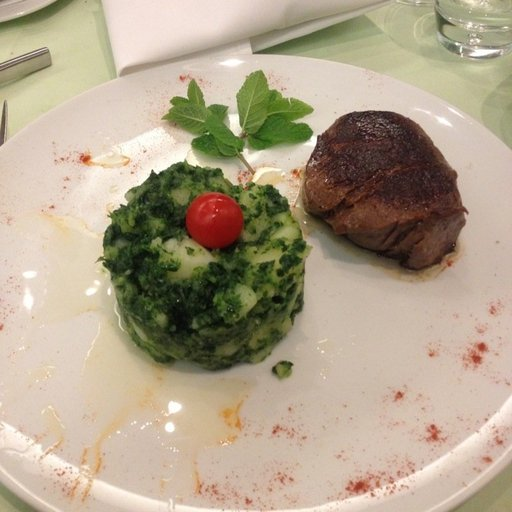

In [ ]:
img_as_arr

# transforming image to tensor

In [ ]:
from torchvision import transforms , datasets
import torch
from torch.utils.data import DataLoader

In [ ]:
data_transform = transforms.Compose([
    # resize our image to 64,64
    transforms.Resize(size=(64,64)),
    # flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # turn the image into a TENSOR
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
def plot_transformed_images(images_paths: list,
                            transform,
                            n,
                            seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(images_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(image_path_list,data_transform , 3 ,None)














# option 1 : loading image data using ImageFolder

In [ ]:
# using ImageFolder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

print(train_data.class_to_idx) ,
print(train_data.classes) ,
print(len(train_data)) ,
print(len(test_data))



{'pizza': 0, 'steak': 1, 'sushi': 2}
['pizza', 'steak', 'sushi']
225
75


In [ ]:
img,label = train_data[0][0] , train_data[0][1]
print(f"image tensor {img}")
print(f"image shape {img.shape}")
print(f"image data type {img.dtype}")

image tensor tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.015

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

Text(0.5, 1.0, 'pizza')

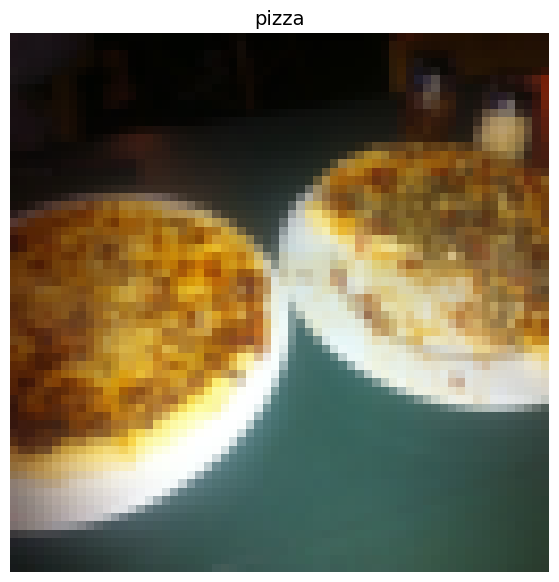

In [ ]:
# rearrange dimension bcoz plot accept color channel last
img_permute = img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

### using dataloader
we use DataLoader to divide images into small batches so that our hardare wont get too heavy and train could be smooth

In [ ]:
import os
os.cpu_count()

2

In [ ]:
 num_workers=min(4,os.cpu_count())
num_workers

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_data_loaders = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                num_workers=1,
                                shuffle=True,
                                )
test_data_loaders = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                               num_workers=1,
                                shuffle=None,
                                )

len(train_data_loaders) , len(test_data_loaders)

(225, 75)

In [ ]:
img, label = next(iter(train_data_loaders))
print(f"image shape {img.shape}")
print(f"label shape {label.shape}")

image shape torch.Size([1, 3, 64, 64])
label shape torch.Size([1])


### option 2 : building our custom dataset

work like ImageFolder

pros
1. can create a Dataset out of almost anything
2. not limited to pytorch pre-build Dataset functions

cons
1. even though we could create Dataset alomost of anything , it doesnt mean it will work
2. offten need to write more codes, which could be prone to errors or performance issues

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List


### helper function for classes

We want a function to:
1. Get the class names using os.scandir() to traverse a target directory ( directory should be in standard image classification format)
2. raise error if the class names aren't found
3. turn the class into a dict and a list and return them

In [ ]:
target_directory = train_dir

In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  # 1. get class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #  2. raise an error if classes names count not found
  if not classes:
    raise FileNotFoundError(f"couldnn't found any classes in {directory}")

  # 3. class to idx
  class_to_idx = {class_names: i for i, class_names in enumerate(classes)}

  return classes,class_to_idx








In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# Replicating Image folder

1. we should inherit class Dataset first
2. init a target_dir
3. create several attriibutes
  . paths - paths of our images
  . transform - transform we would like to use
  . classes and class_to_idx
4. create fun to open image
5. overwrite __len()__ and __getitem__()

In [ ]:
from torch.utils.data import Dataset
import pathlib
class customImageFolder(Dataset):
  def __init__(self,
               dir:str,
               transform=None):
    self.paths = list(pathlib.Path(dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes , self.class_to_idx = find_classes(dir)

  def load_image(self,
                 index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)


  def __len__(self) -> int:
    return len(self.paths)


  def __getitem__(self,index: int) -> Tuple[torch.Tensor , int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx







In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([
   transforms.Resize(size=(64,64)),
   transforms.RandomHorizontalFlip(p=0.5),
   transforms.ToTensor()
])
test_transform = transforms.Compose([
   transforms.Resize(size=(64,64)),
   transforms.ToTensor()
])
train_data_custom = customImageFolder(train_dir,train_transform)
test_data_custom = customImageFolder(test_dir,test_transform)


In [ ]:
print(train_data.classes==train_data_custom.classes)

True


# Create a function to display random function

In [ ]:
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n: int = 10,
                          display_shape: bool= True,
                          seed: int = None):
  if n>10:
    n = 10
    display_shape = False
    print("for display purpose , n shouldn't be larger than 10")
  if seed:
    random.seed(seed)

  random_sample_idx = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))
  for i , targ_sample in enumerate(random_sample_idx):
    targ_img , targ_label = dataset[targ_sample][0] , dataset[targ_sample][1]
    targ_img_adjust = targ_img.permute(1,2,0) # pytorch have color chanel first but matplot expect color channel last so we changing
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_adjust)
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_img_adjust.shape}"
    plt.title(title)
    plt.axis("off")














In [ ]:
# display random imagges from ImageFolder created Dataset
display_random_images(train_data,
                      class_names,
                      5,
                      seed=42)

In [ ]:
# display random images from our custom Image folder Dataset
class_names_custom = train_data_custom.classes
display_random_images(train_data_custom,
                      class_names_custom,
                      11)

for display purpose , n shouldn't be larger than 10


In [ ]:
train_dataloader_custom = DataLoader(train_data_custom,
                                     32,
                                     True,
                                     num_workers= min(4,os.cpu_count()))
test_dataloader_custom = DataLoader(test_data_custom,
                                    32,
                                    shuffle=False,
                                    num_workers=1)



In [ ]:
img_custom , label_custom = next(iter(train_dataloader_custom))

img_custom.shape , label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Data Augmentation
It’s like making new pictures from old ones by rotating, flipping, cropping, adding noise, etc. — so our model learns better and doesn't overfit.

Overfitting happens when our model memorizes the training data too well.
It performs great on training data but bad on new, unseen data.

In [ ]:
# let,s look at trivailaugment
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/421476.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/100135.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/355715.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/97656.jpg')]

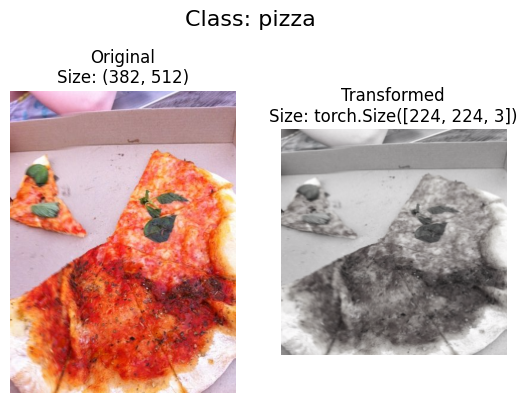

In [ ]:
plot_transformed_images(image_path_list,
                        train_transform,
                        3)


# Model 0: wiithout data augmenation

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(train_dir,
                                  simple_transform,
                                  None)
test_data_simple = datasets.ImageFolder(test_dir,
                                 simple_transform,
                                 None)
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)

In [ ]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_shape:int,
               output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                    stride=2) # default stride value is same as kernal size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                    stride=2) # default stride value is same as kernal size
    )
    self.classifer = nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features=hidden_shape*13*13,
                 out_features=output_shape)
    )

  def forward(self,x):
    z = self.conv_block_1(x)
   # print(z.shape)
    z = self.conv_block_2(z)
   # print(z.shape)
    z = self.classifer(z)
    return z
    # return self.classifer(nn.conv_block_2(conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_shape=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
img , label=next(iter(train_dataloader_simple))
img.shape , label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(img.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

# we use torchinfo to get an idea of the shapes going through our model

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

# train fun

In [ ]:
def train_step (model_0:torch.nn.Module,
                dataloader:torch.utils.data.DataLoader,
                loss_fn:torch.nn.Module,
                optimizer:torch.optim.Optimizer,
                device:device):
  model_0.train()
  train_loss , train_acc = 0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device) , y.to(device)
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss +=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss , train_acc


# test fun

In [ ]:
def test_step (model_0: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device:device):
  model_0.eval()
  test_loss , test_acc = 0,0
  with torch.inference_mode():
    for batch , (X,y) in enumerate(dataloader):
      X,y = X.to(device) , y.to(device)
      test_pred_logits = model_0(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()
      y_pred_labels =torch.argmax(test_pred_logits, dim=1)
      test_acc += (y_pred_labels==y).sum().item()/len(y_pred_labels)
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss , test_acc


# train (combine of train fun and test fun)

In [ ]:
from tqdm.auto import tqdm
def train (model_0: torch.nn.Module,
           train_dataloader: torch.utils.data.DataLoader,
           test_dataloader: torch.utils.data.DataLoader,
           loss_fn: torch.nn.Module,
           optimizer: torch.optim.Optimizer,
           device:device,
           epochs: int = 5):
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }
  for epoch in tqdm(range(epochs)):
    train_loss , train_acc = train_step(
        model_0=model_0,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device=device
    )
    test_loss, test_acc = test_step(
        model_0=model_0,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        device=device
    )
    print(f"epoch {epoch} : train loss: {train_loss:.4f} | train accuracy:{train_acc:.4f} | test loss: {test_loss:.4f} | test accuracy:{test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

# train and evaluate model 0


In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
EPOCHS = 5
model_0 = TinyVGG(input_shape=3,
                  hidden_shape=10,
                  output_shape=len(class_names)).to(device)
from timeit import default_timer as timer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
start = timer()
model_0_results = train(
    model_0=model_0,
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    loss_fn=loss_fn,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS
)
end = timer()
print(f"total training time {end - start:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0 : train loss: 1.1063 | train accuracy:0.3047 | test loss: 1.0983 | test accuracy:0.3011
epoch 1 : train loss: 1.0998 | train accuracy:0.3281 | test loss: 1.0697 | test accuracy:0.5417
epoch 2 : train loss: 1.0869 | train accuracy:0.4883 | test loss: 1.0808 | test accuracy:0.4924
epoch 3 : train loss: 1.0845 | train accuracy:0.4023 | test loss: 1.0607 | test accuracy:0.5833
epoch 4 : train loss: 1.0663 | train accuracy:0.4180 | test loss: 1.0658 | test accuracy:0.5644
total training time 5.459


# plot the loss curve
a loss curve is a way off tracking our model's progress over time

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results:Dict[str,List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))

  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train loss")
  plt.plot(epochs,test_loss,label="test loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train accuracy")
  plt.plot(epochs,test_accuracy,label="test accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

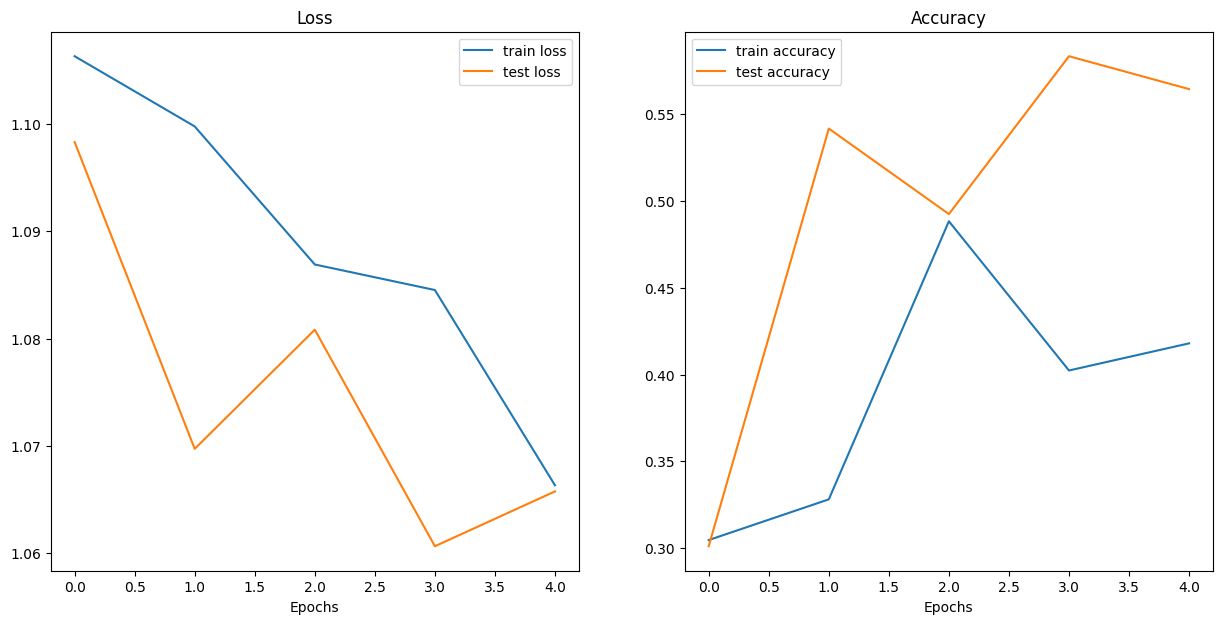

In [ ]:
plot_loss_curves(model_0_results)

different types of curve and what ideal curve looks like
https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves


1. under fitting curve - it means model is too simple or not trained enough
2. over fitting curve - it means model is memorizing data not patterns so that it performs well during training but not during testing
3. balanced curve - it is curve what we expect from model

# Model 1: with Data Augmentation

In [ ]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(
    root=train_dir,
    transform=train_transform_trivial
)
test_data_simple = datasets.ImageFolder(
    root=train_dir,
    transform=test_transform_simple
)

In [ ]:
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS=min(4,os.cpu_count())
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size = BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)
test_dataloader_simple = DataLoader(
    dataset=train_data_augmented,
    batch_size = BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [ ]:
# torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_shape=10,
    output_shape=len(train_data_augmented.classes)
).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

# train second model with data augmentation

In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
EPOCHS = 5
from timeit import default_timer as timer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
start = timer()
model_1_results = train(
    model_0=model_1,
    train_dataloader=train_dataloader_augmented,
    test_dataloader=test_dataloader_simple,
    loss_fn=loss_fn,
    optimizer=optimizer,
    device=device,
    epochs=EPOCHS
)
end = timer()
print(f"total training time {end - start:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0 : train loss: 1.0969 | train accuracy:0.4258 | test loss: 1.0975 | test accuracy:0.3047
epoch 1 : train loss: 1.0968 | train accuracy:0.4258 | test loss: 1.0974 | test accuracy:0.3047
epoch 2 : train loss: 1.0963 | train accuracy:0.4258 | test loss: 1.0975 | test accuracy:0.3047
epoch 3 : train loss: 1.0994 | train accuracy:0.3047 | test loss: 1.0977 | test accuracy:0.3047
epoch 4 : train loss: 1.0966 | train accuracy:0.4258 | test loss: 1.0975 | test accuracy:0.3047
total training time 6.792


# plot the loss curves of model_1

loss curve is used to evaluate our models performance overtime

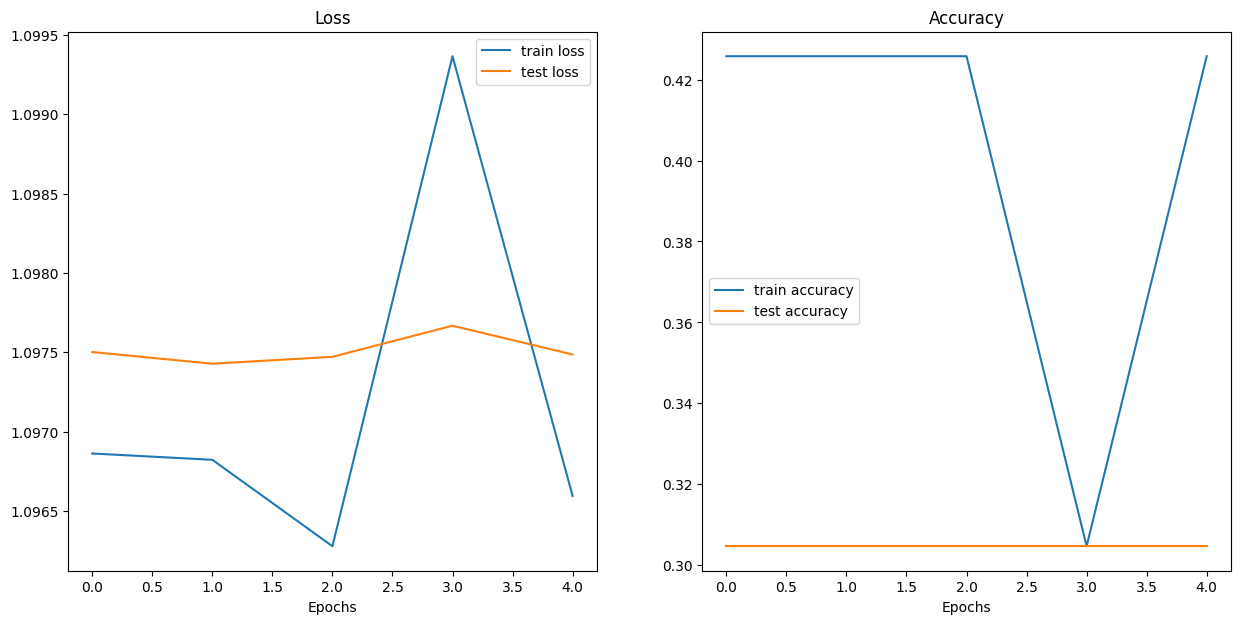

In [ ]:
plot_loss_curves(model_1_results)

# compare model results

after evaluating our modelling experiments on their own , its important to compare to each other.

there's a few difff ways to do:
1. hard coding ( what we're doing )
2. pytorch + tensorboard - https://docs.pytorch.org/docs/stable/tensorboard.html
3. weights and biases - https://wandb.ai/site/experiment-tracking/
4. MLFLOW - https://mlflow.org/



In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.106319   0.304688   1.098322  0.301136
1    1.099778   0.328125   1.069732  0.541667
2    1.086912   0.488281   1.080834  0.492424
3    1.084532   0.402344   1.060659  0.583333
4    1.066338   0.417969   1.065766  0.564394

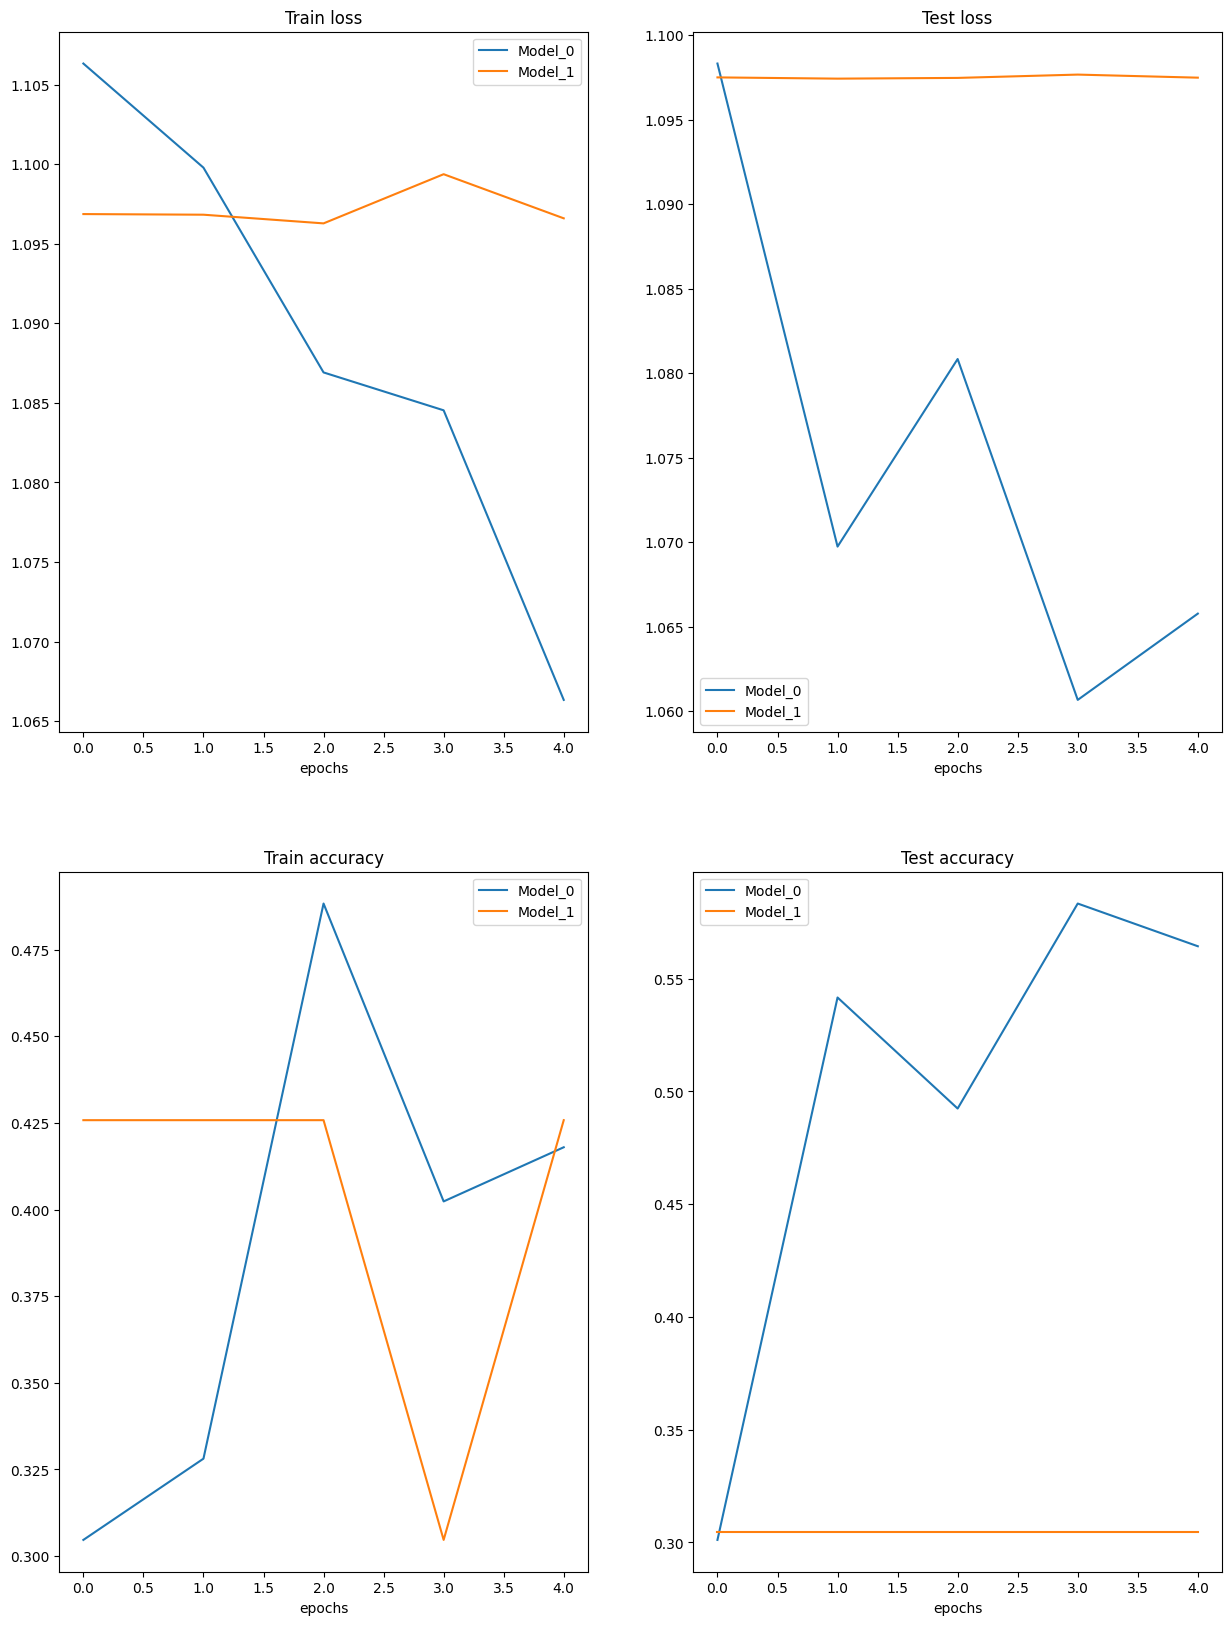

In [ ]:
plt.figure(figsize=(15,20))
epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"],label="Model_0")
plt.plot(epochs,model_1_df["train_loss"],label="Model_1")
plt.title("Train loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"],label="Model_0")
plt.plot(epochs,model_1_df["test_loss"],label="Model_1")
plt.title("Test loss")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_acc"],label="Model_0")
plt.plot(epochs,model_1_df["train_acc"],label="Model_1")
plt.title("Train accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"],label="Model_0")
plt.plot(epochs,model_1_df["test_acc"],label="Model_1")
plt.title("Test accuracy")
plt.xlabel("epochs")
plt.legend()

# Making prediction with Custom image
making prediction on a image that is not either in training or testing dataset

In [ ]:
import requests
custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/images/04-pizza-dad.jpeg")
    print(f"downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")

data/04-pizza-dad.jpeg already exists


# loading in a custom image with pytorch
Now, we have to make sure that our image is in same format as the data our model was trained on.
* in tensor form wih dtype(float 32)
* shape 64,64,3
* right shape

In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensorv:\n{custom_image_uint8}")
print(f"custom image shape: {custom_image_uint8.shape}")
print(f"custom image data type: {custom_image_uint8.dtype}")

custom image tensorv:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape: torch.Size([3, 4032, 3024])
custom image data

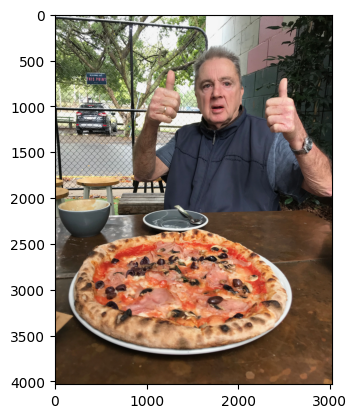

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
from torchvision import transforms
import torch
image_transform = transforms.Compose([
    transforms.ConvertImageDtype(torch.float32),
    transforms.Resize(size=(64,64))
])
custom_image = image_transform(custom_image_uint8)
custom_image_transform = custom_image.unsqueeze(dim=0)
custom_image_transform.shape

model_1.eval()
with torch.inference_mode():
  y = model_1(custom_image_transform.to(device))
  y_pred = torch.argmax(y,dim=1)
print(class_names[y_pred.item()])

pizza


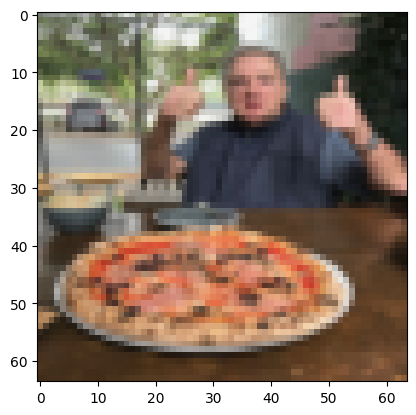

In [ ]:
plt.imshow(custom_image.permute(1,2,0))

In [ ]:
custom_image_ufloat = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
float_transform = transforms.Resize(size=(64,64))
custom_image_read = float_transform(custom_image_ufloat)
custom_image_read.shape

torch.Size([3, 64, 64])

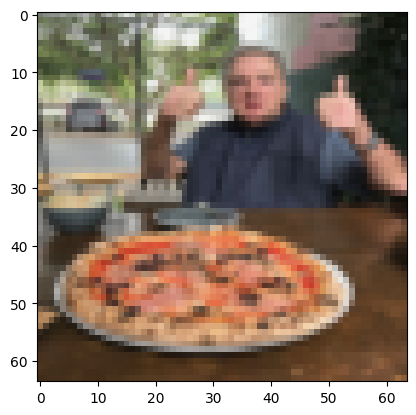

In [ ]:
plt.imshow(custom_image.permute(1,2,0))

# some imp notes
* for matplot imshow, if image dtype is integer than tensor value should be betn 0 to 255 and if dtype is in float than tensor value should be betn 0 to 1
* numpy.array and numpy.asarray as both converts image to numpy array but key diff is .array makes duplicate of it but .asarray wont

Note , to pred with custom image make sure
* img is in same device
* same size , same dtype , shape
* turn into tensor

# Function for predicting custom image
basically we are building a function that takes image path and pred the image

In [ ]:
import requests
import torch
from torchvision import transforms
def pred_custom_image(model:torch.nn.Module,
                      image_path:str,
                      class_names: List[str]=None,
                      transform=None,
                      device=device):
  image = torchvision.io.read_image(image_path).type(torch.float32) / 255
  image_transform = transform(image)
  image_topred = image_transform.unsqueeze(dim=0).to(device)
  model_1.eval()
  with torch.inference_mode():
    y = model_1(image_topred)
  y_prob = torch.softmax(y,dim=1)
  y_pred = torch.argmax(y,dim=1)
  plt.imshow(image_topred.squeeze().permute(1,2,0).cpu())
  if class_names:
    title = f"{class_names[y_pred]} | prob: {y_prob.max():.2f}"
  else:
    title = f"{y_pred} | prob: {y_prob.max():.2f}"
  plt.title(title)
  plt.axis(False)


In [ ]:
pred_custom_image(model=model_1,
                  image_path=custom_image_path,
                  class_names=class_names,
                  device=device,
                  transform=float_transform)

In [1]:
from IPython.display import clear_output
clear_output()